# Домашнее задание к лекции "Базовые понятия статистики"

Вашей задачей будет осуществить работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

## Задание 1. Загрузка данных

Изучите представленный набор данных на основе описания его столбцов, загрузите его и оставьте 8 столбцов для дальнейшего изучения: 
- `surgery`
- `Age`
- `rectal temperature`
- `pulse`
- `respiratory rate`
- `temperature of extremities`
- `pain`
- `outcome`

## Задание 2. Первичное изучение данных

Проанализируйте значения по столбцам, рассчитайте базовые статистики, найдите выбросы.

## Задание 3. Работа с пропусками

Рассчитайте количество пропусков для всех выбранных столбцов. Примите и обоснуйте решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформируйте датафрейм, в котором пропуски будут отсутствовать.


# Загрузка данных


\Более подробно познакомиться с описанием датасета можно по ссылке на [kaggle](https://www.kaggle.com/datasets/uciml/horse-colic)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('horse_data.csv', sep=',')
df.head()

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
1,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
2,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
3,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
4,2,1,528355,?,?,?,2,1,3,1,...,?,?,?,?,1,2,0,0,0,2


In [ ]:
column_names = ['surgery','Age','Hospital Number','rectal temperature','pulse','respiratory rate','temperature of extremities','peripheral pulse',
             'mucous membranes','capillary refill time','pain','peristalsis','abdominal distension','nasogastric tube','nasogastric reflux', 'nasogastric reflux PH','rectal examination - feces','abdomen','packed cell volume','total protein','abdominocentesis appearance',
             'abdomcentesis total protein','outcome','surgical lesion','type of lesion_1','type of lesion_2','type of lesion_3','cp_data']

In [ ]:
df = pd.read_csv('horse_data.csv', names=column_names,  na_values="?")
df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion_1,type of lesion_2,type of lesion_3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


Оставляю только те столбцы, которые требуется исследовать в задании

In [ ]:
df = df[ ['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']]
df.head()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


# Первичное изучение данных

In [ ]:
# У категориальных переменных проставляю тип данных category:

categorical_col = ['surgery', 'Age', 'temperature of extremities', 'pain', 'outcome']
for col in categorical_col:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery                     299 non-null    category
 1   Age                         300 non-null    category
 2   rectal temperature          240 non-null    float64 
 3   pulse                       276 non-null    float64 
 4   respiratory rate            242 non-null    float64 
 5   temperature of extremities  244 non-null    category
 6   pain                        245 non-null    category
 7   outcome                     299 non-null    category
dtypes: category(5), float64(3)
memory usage: 9.4 KB


In [ ]:
# Вывожу описательные статистики по количественным признакам
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rectal temperature,240.0,38.167917,0.732289,35.4,37.8,38.2,38.5,40.8
pulse,276.0,71.913043,28.630557,30.0,48.0,64.0,88.0,184.0
respiratory rate,242.0,30.417355,17.642231,8.0,18.5,24.5,36.0,96.0


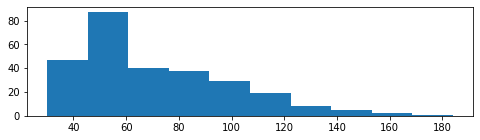

In [ ]:
plt.figure(figsize=(8, 2))
plt.hist(df.pulse)
plt.show()

Из описания данных не видно аномалий и ошибок. Высокое значение пульса объясняется сильным стандартным отклонением от среднего значения (мат.ожидания)

### Выбросы в данных

Определим выбросы в данных с помощью межквартильного размаха между 1-ым и 3-м квартилем.
* Lower Outlier = Q1 - 1.5*IQR
* Higher Outlier = Q3 + 1.5 * IQR

**Важным условием применения данного метода является наличие нормального распределения у признака.**

Проведем проверку на нормальность с помощью построения графика, а также рассчитаем средне значение, медиану и моду у данного показателя.

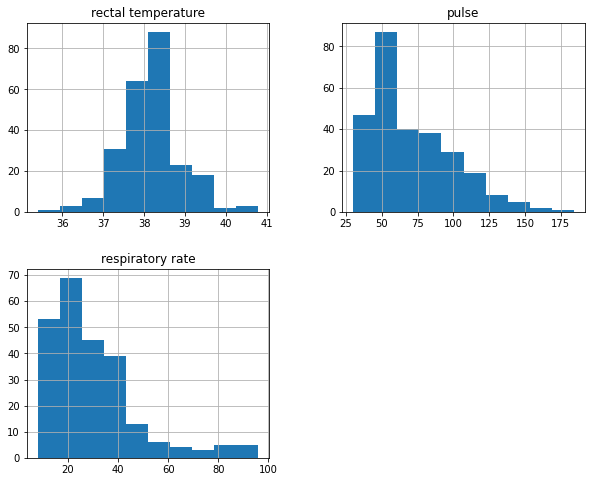

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
print(round(df['rectal temperature'].mean()))
print(round(df['rectal temperature'].median()))
print(round(df['rectal temperature'].mode()))

38
38
0    38.0
dtype: float64


Из графиков видно, что pulse и respiratory rate распределены не по нормальному закону. При этом rectal temerature на графике имеет форму близкую к нормальному. Важным признаком, указывающим на нормальном распределением является равенство моды, медианы и среднего значения. Следовательно, выбросы будем искать с помощью iqr только в rectal temperature

In [ ]:
q1 = df['rectal temperature'].quantile(0.25)
q3 = df['rectal temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['rectal temperature'].between(lower_bound, upper_bound)]
remove_outliers.head()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


Проведем сравнение средних значений у двух выборок с выбросами и без.

In [ ]:
print(remove_outliers['rectal temperature'].mean())
print(df['rectal temperature'].mean())

38.169026548672576
38.16791666666669


In [ ]:
print('Всего записей в выборке:', len(df) )
print('Кол-во выбросов в поле rectal temperature:', len(df) - len(remove_outliers))
print('Процент записей с выбросами:', (len(df) - len(remove_outliers)) / len(df) * 100 )

Всего записей в выборке: 300
Кол-во выбросов в поле rectal temperature: 74
Процент записей с выбросами: 24.666666666666668


Вывод: Выбросы носят естественный характер, исключение выбросов никак не влияет на меры центральной тендеции. При этом оставив полную выборку мы сохраним 24.6% данных, что должно улучшить выявления закономерностей в данных

# Пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery                     299 non-null    category
 1   Age                         300 non-null    category
 2   rectal temperature          240 non-null    float64 
 3   pulse                       276 non-null    float64 
 4   respiratory rate            242 non-null    float64 
 5   temperature of extremities  244 non-null    category
 6   pain                        245 non-null    category
 7   outcome                     299 non-null    category
dtypes: category(5), float64(3)
memory usage: 9.4 KB


In [ ]:
#  Смотрю какой % значений не заполнен в данных
df.isna().mean() * 100

surgery                        0.333333
Age                            0.000000
rectal temperature            20.000000
pulse                          8.000000
respiratory rate              19.333333
temperature of extremities    18.666667
pain                          18.333333
outcome                        0.333333
dtype: float64

## Категориальные признаки
Категориальные признаки заменим наиболее часто встречающимися данными, т.е модой.

In [ ]:
for col in df.columns.values:
  if df[col].isnull().sum() > 0:
    if df[col].dtype == 'category':

      df[col].fillna(df[col].mode()[0], inplace = True)

(100 * df.isna().mean().sort_values(ascending=False)).round()

rectal temperature            20.0
respiratory rate              19.0
pulse                          8.0
surgery                        0.0
Age                            0.0
temperature of extremities     0.0
pain                           0.0
outcome                        0.0
dtype: float64

## Количественные признаки

#### Rectal temperature.
Целесообразно восстановить пропуски rectal temperature медианой температурой в рамках каждой группы temperature of extremities (температура конечностей). Реактальная температура коррелирует с температура конечностей.

In [ ]:
df['rectal temperature'].fillna(df.groupby(['temperature of extremities'])['rectal temperature'].transform('median'), inplace=True)

#### Pulse
Восстановим пропуски в показателе pulse. Пульс учащается при сильных болевых синдромах, в связи с этим восстановим пропуски медиаными значением в рамках каждой болевой группы (pain).

In [ ]:
df['pulse'].fillna(df.groupby('pain')['pulse'].transform('median'), inplace=True)

#### Respiratory rate
Из описания следует, что данный показатель подвержен сильному шуму и его эффективность в анализе сомнительная. Данный столбец можно было бы исключить из анализа, но я решил сохранить данный показатель в датасете, а отсутствующие значения заменить медианной, т.к. она мене чувствительна к выбросам по сравнению со ср.зн.

In [ ]:
df['respiratory rate'].fillna(df['respiratory rate'].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery                     300 non-null    category
 1   Age                         300 non-null    category
 2   rectal temperature          300 non-null    float64 
 3   pulse                       300 non-null    float64 
 4   respiratory rate            300 non-null    float64 
 5   temperature of extremities  300 non-null    category
 6   pain                        300 non-null    category
 7   outcome                     300 non-null    category
dtypes: category(5), float64(3)
memory usage: 9.4 KB


# Вывод:
- В итоге мы подготовили данные для анализа и исключили в них пропуски;
- Количественный показатель rectal temperature распределен нормально и его выбросы практически не влияют на среднее значение;
- pulse и respiratory rate  имеют не нормальное распределение, к ним нельзя применять метод поиска выбросовы через iqr. Оба показателя имеют сильную дисперсию. При этом я решил оба показателя не исключать из данных, т.к. они могут иметь сильную корреляцию с целевым признаком outcome (что в итоге случилось с лошадью).